In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
#EXERCÍCIO 1.
#Definindo a função do Método de Newton e deixando já estabelecido os parametros base como tolerância e maxit

maxit = 20

t = 1e-8

def metodo_newton(f, df, x0, t, maxit):
    x = x0
    n = 1
    converge = 1

    xk_list = [x]
    fxk_list = [f(x)]

    print(f"{'k':<3} {'xk':<12} {'f(xk)':<15} {'f\'(xk)':<15} {'step':<15}")
    print("-" * 65)

    while n <= maxit:
        fx = f(x)
        dfx = df(x)

        if abs(dfx) < 1e-12:
            print("\nDerivada muito pequena.")
            break

        step = fx / dfx
        print(f"{n:<3} {x:<12.6E} {fx:<15.6E} {dfx:<15.6E} {abs(step):<15.6E}")

        x_novo = x - step
        xk_list.append(x_novo)
        fxk_list.append(f(x_novo))

        if abs(x_novo - x) < t:
            print("\nConvergência alcançada.")
            converge = 0
            x = x_novo
            break

        x = x_novo
        n += 1

    if n > maxit:
        print("\nNúmero máximo de iterações atingido.")
        converge = 1

    print(f"\nNúmero de iterações: {n-1}")
    if converge == 0:
        print(f"x*: {x:.15E}")


    return x, xk_list, fxk_list






In [5]:
#FUNÇÃO 1 - f(x) = xe^−x, x0 = 2, x0 = 0.5.

def f(x):
    return x * math.exp(-x)

def df(x):
    return math.exp(-x) * (1 - x)


k   xk           f(xk)           f'(xk)          step           
-----------------------------------------------------------------
1   5.000000E-01 3.032653E-01    3.032653E-01    1.000000E+00   
2   -5.000000E-01 -8.243606E-01   2.473082E+00    3.333333E-01   
3   -1.666667E-01 -1.968934E-01   1.378254E+00    1.428571E-01   
4   -2.380952E-02 -2.438322E-02   1.048478E+00    2.325581E-02   
5   -5.537099E-04 -5.540165E-04   1.001108E+00    5.534034E-04   
6   -3.064249E-07 -3.064250E-07   1.000001E+00    3.064248E-07   
7   -9.389621E-14 -9.389621E-14   1.000000E+00    9.389621E-14   

Convergência alcançada.

Número de iterações: 6
x*: -8.809998589508260E-27


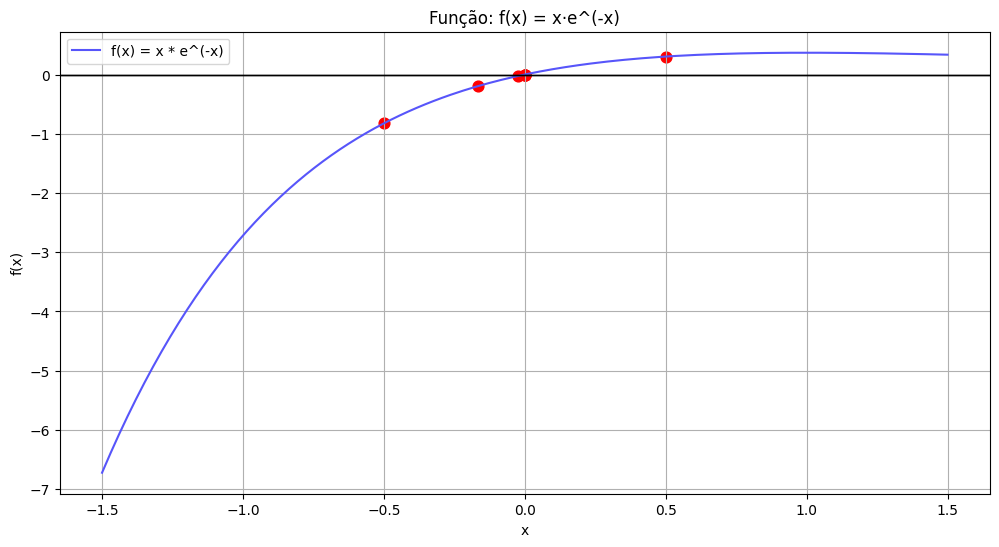

In [6]:
#Chamando a função para x0 = 0.5
x0 = 0.5

x_final, xk_list, fxk_list = metodo_newton(f, df, x0, t, maxit)

plt.style.use('default')

valor_x = np.linspace(-1.5, 1.5, 200)
valor_y = [f(x) for x in valor_x]

plt.figure(figsize=(12, 6))
plt.plot(valor_x, valor_y, color='#5755FA', label='f(x) = x * e^(-x)')
plt.axhline(0, color='black', linewidth=1)
plt.scatter(xk_list, fxk_list, color='red', s=60)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: f(x) = x·e^(-x)')
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()


k   xk           f(xk)           f'(xk)          step           
-----------------------------------------------------------------
1   2.000000E+00 2.706706E-01    -1.353353E-01   2.000000E+00   
2   4.000000E+00 7.326256E-02    -5.494692E-02   1.333333E+00   
3   5.333333E+00 2.574907E-02    -2.092112E-02   1.230769E+00   
4   6.564103E+00 9.255968E-03    -7.845879E-03   1.179724E+00   
5   7.743826E+00 3.356253E-03    -2.922843E-03   1.148284E+00   
6   8.892110E+00 1.222392E-03    -1.084923E-03   1.126709E+00   
7   1.001882E+01 4.463740E-04    -4.018204E-04   1.110879E+00   
8   1.112970E+01 1.632740E-04    -1.486039E-04   1.098720E+00   
9   1.222842E+01 5.979102E-05    -5.490151E-05   1.089060E+00   
10  1.331748E+01 2.191367E-05    -2.026819E-05   1.081185E+00   
11  1.439866E+01 8.036415E-06    -7.478279E-06   1.074634E+00   
12  1.547330E+01 2.948596E-06    -2.758036E-06   1.069093E+00   
13  1.654239E+01 1.082255E-06    -1.016832E-06   1.064340E+00   
14  1.760673E+01 3.97349

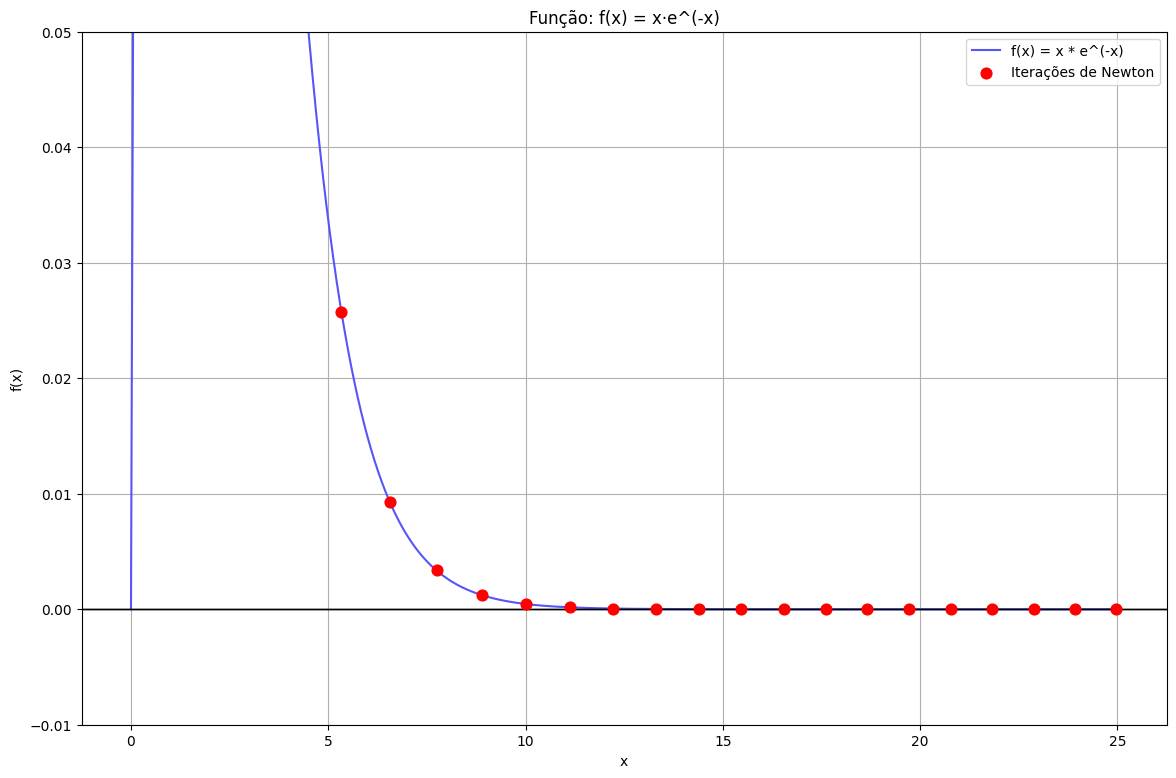

In [7]:
#Chamando a função para x0 = 2
x0 = 2
x_final, xk_list, fxk_list = metodo_newton(f, df, x0, t, maxit)

plt.style.use('default')

valor_x = np.linspace(0, 25, 2000)
valor_y = [f(x) for x in valor_x]

plt.figure(figsize=(14, 9))
plt.plot(valor_x, valor_y, color='#5755FA', label='f(x) = x * e^(-x)')
plt.axhline(0, color='black', linewidth=1)
plt.scatter(xk_list, fxk_list, color='red', s=60, label='Iterações de Newton', zorder=5)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: f(x) = x·e^(-x)')
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain')
plt.ylim(-0.01, 0.05)


plt.show()

In [8]:
#FUNÇÃO 2: f(x) = x^3 - x - 3, x0 = 0.57, x0 = 0.62

def f(x):
    return x**3 - x - 3

def df(x):
    return 3*x**2 - 1


k   xk           f(xk)           f'(xk)          step           
-----------------------------------------------------------------
1   5.700000E-01 -3.384807E+00   -2.530000E-02   1.337868E+02   
2   -1.332168E+02 -2.364032E+06   5.323918E+04    4.440400E+01   
3   -8.881284E+01 -7.004450E+05   2.366216E+04    2.960190E+01   
4   -5.921093E+01 -2.075335E+05   1.051680E+04    1.973351E+01   
5   -3.947742E+01 -6.148778E+04   4.674401E+03    1.315415E+01   
6   -2.632327E+01 -1.821646E+04   2.077744E+03    8.767421E+00   
7   -1.755585E+01 -5.396295E+03   9.236236E+02    5.842526E+00   
8   -1.171332E+01 -1.598377E+03   4.106058E+02    3.892729E+00   
9   -7.820594E+00 -4.735001E+02   1.824851E+02    2.594734E+00   
10  -5.225860E+00 -1.404904E+02   8.092885E+01    1.735974E+00   
11  -3.489886E+00 -4.201451E+01   3.553792E+01    1.182244E+00   
12  -2.307642E+00 -1.298104E+01   1.497563E+01    8.668106E-01   
13  -1.440831E+00 -4.550326E+00   5.227984E+00    8.703789E-01   
14  -5.70452

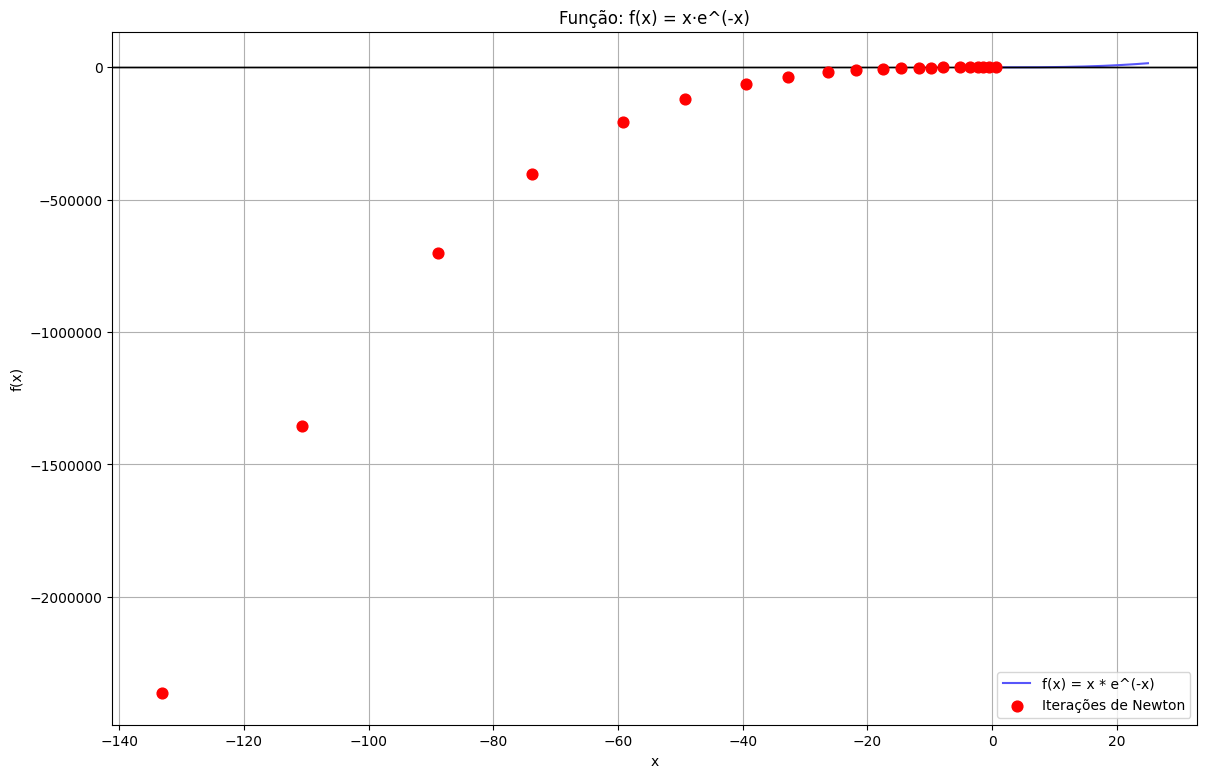

In [9]:
#Chamando o método de newton para x0 = 0.57
x0 = 0.57

x_final, xk_list, fxk_list = metodo_newton(f, df, x0, t, maxit)

plt.style.use('default')

valor_x = np.linspace(0, 25, 2000)
valor_y = [f(x) for x in valor_x]

plt.figure(figsize=(14, 9))
plt.plot(valor_x, valor_y, color='#5755FA', label='f(x) = x * e^(-x)')
plt.axhline(0, color='black', linewidth=1)
plt.scatter(xk_list, fxk_list, color='red', s=60, label='Iterações de Newton', zorder=5)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: f(x) = x·e^(-x)')
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain')





k   xk           f(xk)           f'(xk)          step           
-----------------------------------------------------------------
1   6.200000E-01 -3.381672E+00   1.532000E-01    2.207358E+01   
2   2.269358E+01 1.166146E+04    1.543995E+03    7.552784E+00   
3   1.514079E+01 3.452789E+03    6.867308E+02    5.027864E+00   
4   1.011293E+01 1.021150E+03    3.058140E+02    3.339121E+00   
5   6.773808E+00 3.010389E+02    1.366534E+02    2.202937E+00   
6   4.570872E+00 8.792775E+01    6.167861E+01    1.425579E+00   
7   3.145292E+00 2.497066E+01    2.867859E+01    8.707072E-01   
8   2.274585E+00 6.493521E+00    1.452121E+01    4.471749E-01   
9   1.827410E+00 1.275095E+00    9.018285E+00    1.413900E-01   
10  1.686020E+00 1.067694E-01    7.527993E+00    1.418299E-02   
11  1.671837E+00 1.014612E-03    7.385120E+00    1.373860E-04   
12  1.671700E+00 9.466481E-08    7.383742E+00    1.282071E-08   
13  1.671700E+00 8.881784E-16    7.383741E+00    1.202884E-16   

Convergência alcançada.

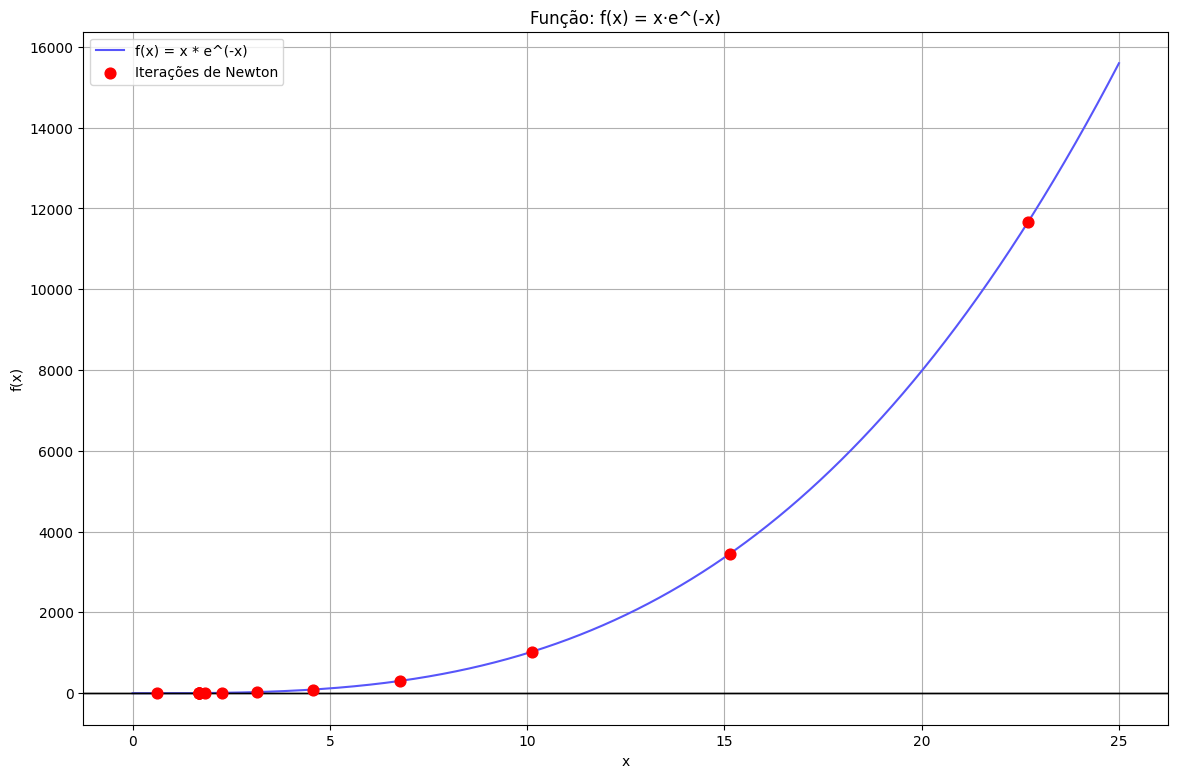

In [10]:
#Chamando o método de newton para x0 = 0.62
x0 = 0.62
x_final, xk_list, fxk_list = metodo_newton(f, df, x0, t, maxit)

plt.style.use('default')

valor_x = np.linspace(0, 25, 2000)
valor_y = [f(x) for x in valor_x]

plt.figure(figsize=(14, 9))
plt.plot(valor_x, valor_y, color='#5755FA', label='f(x) = x * e^(-x)')
plt.axhline(0, color='black', linewidth=1)
plt.scatter(xk_list, fxk_list, color='red', s=60, label='Iterações de Newton', zorder=5)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: f(x) = x·e^(-x)')
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain')

In [11]:
#FUNÇÃO 3: F(x) = arctg(x), x0 = 1.45, x0 = 1

def f(x):
    return math.atan(x)

def df(x):
    return 1/(x**2 + 1)

In [12]:
#chamando Newton para x0 = 1.45

x_final, xk_list, fxk_list = metodo_newton(f, df, x0, t, maxit)




k   xk           f(xk)           f'(xk)          step           
-----------------------------------------------------------------
1   6.200000E-01 5.549957E-01    7.223346E-01    7.683361E-01   
2   -1.483361E-01 -1.472623E-01   9.784701E-01    1.505025E-01   
3   2.166465E-03 2.166461E-03    9.999953E-01    2.166472E-03   
4   -6.778963E-09 -6.778963E-09   1.000000E+00    6.778963E-09   

Convergência alcançada.

Número de iterações: 3
x*: 0.000000000000000E+00


In [ ]:
#chamando Newton para x0 =